In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib

In [2]:
data =pd.read_csv("C:/Users/onkar/Downloads/4_may_prj/KNN_Project_5&6/KNN Assignment/iphone_purchase_records.csv")
print(data.head())

   Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0


In [3]:
df = data.copy()
df.head(5)

Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [5]:
df.describe()

Age         Salary  Purchase Iphone
count  400.000000     400.000000       400.000000
mean    37.655000   69742.500000         0.357500
std     10.482877   34096.960282         0.479864
min     18.000000   15000.000000         0.000000
25%     29.750000   43000.000000         0.000000
50%     37.000000   70000.000000         0.000000
75%     46.000000   88000.000000         1.000000
max     60.000000  150000.000000         1.000000

In [6]:
sns.countplot(x = 'Gender', data = df)
plt.title('Gender Distribution')
plt.savefig('graphs/gender_distributionPRJ5.png')

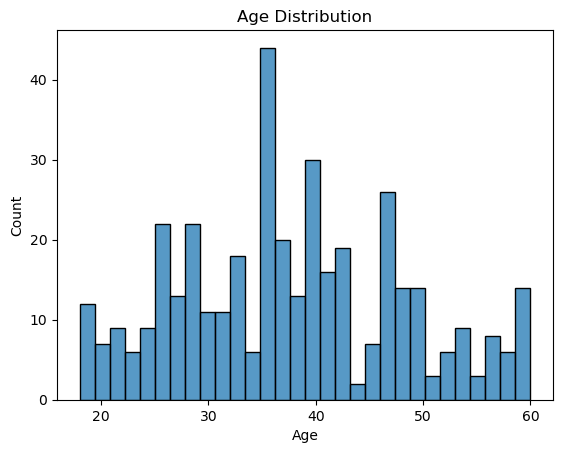

In [7]:
sns.histplot(df['Age'], bins=30)
plt.title('Age Distribution')
plt.savefig('graphs/Age_distributionPRJ5.png')

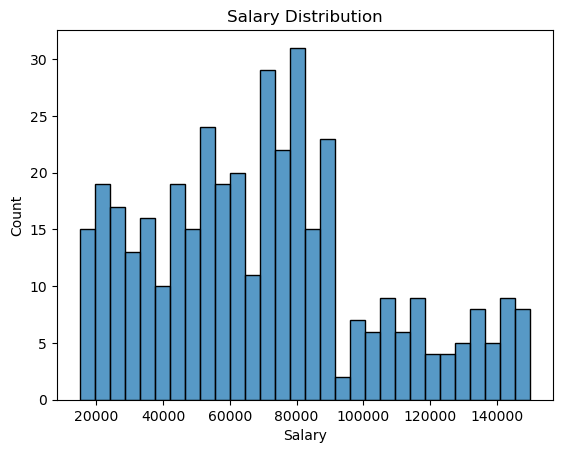

In [8]:
sns.histplot(df['Salary'], bins=30)
plt.title('Salary Distribution')
plt.savefig('graphs/salary_distributionPRJ5.png')

C:\Users\onkar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


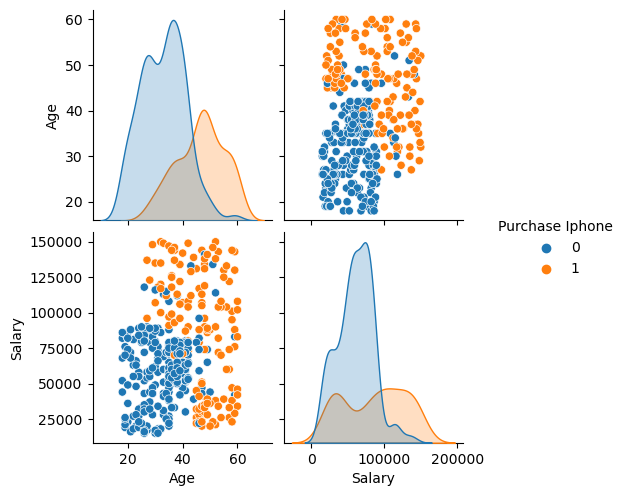

In [9]:
sns.pairplot(df, hue='Purchase Iphone')
plt.savefig('graphs/PairplotPRJ5.png')

In [10]:
lebel_encoder = LabelEncoder()
df['Gender'] = lebel_encoder.fit_transform(df['Gender'])

In [11]:
X = df[['Gender','Age','Salary']]
y = df['Purchase Iphone']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
pred = model.predict(X_test)
print("Model Pridiction is complete")

Model Pridiction is complete


In [16]:
accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
f1 = f1_score(y_test,pred)

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:",f1)

print("Classification Report:\n", classification_report(y_test,pred))

Accuracy: 0.925
Precision: 0.8666666666666667
Recall: 0.9285714285714286
F1 Score: 0.896551724137931
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [17]:
import os
os.makedirs('notebooks', exist_ok=True)


In [18]:
joblib.dump(model, 'notebooks/knn_modelPRJ5.pkl')
joblib.dump(scaler, 'notebooks/scalerPRJ5.pkl')

['notebooks/scalerPRJ5.pkl']